# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů určete jeho chybu pomocí RMSE a MAE. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tato data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte s využitím tří sloupců: **Country**, **Year** a **Life expectancy**. Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka prvních řádků souboru `results.csv`:
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

_______________________________________________

## Příprava dat

 Začínáme importováním potřebných balíčků a načtením datasetu:

In [1191]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [1192]:
df = pd.read_csv('data.csv')

Koukneme, jak vypadají příznaky, a jaké máme typy příznaků. 

In [1193]:
 df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [1194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2564 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2188 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2692 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

Jeden z prvních příznaků je status země. Tady máme buď rozvinuté, nebo rozvojové země. Podíváme se, jaké rozvinuté země máme:

In [1195]:
developed_countries = df[df['Status'] == 'Developed']['Country'].unique()
print(developed_countries)

['Australia' 'Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia'
 'Denmark' 'Germany' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan'
 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Netherlands' 'New Zealand'
 'Norway' 'Poland' 'Portugal' 'Romania' 'Singapore' 'Slovakia' 'Slovenia'
 'Spain' 'Sweden' 'Switzerland'
 'United Kingdom of Great Britain and Northern Ireland'
 'United States of America']


Ten seznam mi nepřipadá úplně celý, protože tady například nevidím Kanadu, Francii, atd. Můžu zkontrolovat pomocí aktuálního seznamu rozvinutých zemí (kvalifikace od IMF a UN). Musím připomenout, že máme záznamy od roku 2000 do roku 2015. To znamená, že status země mohl být i jiný, avšak udělám změny, které mi připadají vhodné.

Změním status některých států na "Developed".

In [1196]:
countries_to_update = ['Canada', 'France', 'Republic of Korea', 'Finland', 'Estonia', 'Greece', 'Israel']
df.loc[df['Country'].isin(countries_to_update), 'Status'] = 'Developed'

In [1197]:
df[df['Status'] == 'Developed']['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Bulgaria', 'Canada', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Republic of Korea', 'Romania', 'Singapore', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America'], dtype=object)

Převedeme kategorické příznaky na kategorický typ a nahradíme je číselnými kódy.

In [1198]:
df['Country'] = df['Country'].astype("category")
df['Status'] = df['Status'].astype("category")

In [1199]:
df.Country = df.Country.cat.codes
df.Status = df.Status.cat.codes

In [1200]:
df.dtypes

Country                              int16
Year                                 int64
Status                                int8
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

Dále mohu například vidět, že hodnota příznaku "Population" u země hrozně skáče. Například u Albánie v roce 2011 je populace 295195, v roce 2012 je 2941, v roce 2013 je zase 289592. Tato informace nevypadá pravdivě. 

Chci ověřit korelace mezi naší cílovou proměnnou "Life Expectancy" a ostatními příznaky.

In [1201]:
correlation_matrix = df.corr()
life_expectancy_correlation = correlation_matrix['Life expectancy']
print(life_expectancy_correlation)

Country                           -0.003248
Year                               0.179403
Status                            -0.546833
Life expectancy                    1.000000
Adult Mortality                   -0.693881
infant deaths                     -0.192327
Alcohol                            0.395060
percentage expenditure             0.385182
Hepatitis B                        0.268119
Measles                           -0.151915
BMI                                0.565741
under-five deaths                 -0.218630
Polio                              0.479179
Total expenditure                  0.229724
Diphtheria                         0.487182
HIV/AIDS                          -0.557762
GDP                                0.462631
Population                        -0.021464
thinness  1-19 years              -0.476904
thinness 5-9 years                -0.471579
Income composition of resources    0.717080
Schooling                          0.749474
Name: Life expectancy, dtype: fl

Vidíme z této matice, že název země a populace mají nízkou korelaci spolu s "Life Expectancy", takže příznak "Population" nemá velký vliv na délku dožití. Opravdu nepotřebuji a smažu ho. Název země můžu také smazat, ale jak se vyzkoušela dále, odstranění názvů nemá velký vliv, takže nechám.

In [1202]:
df.drop(columns=['Population'], inplace=True)

Takže ve výpisech nahoře jsem si všimla špatného názvu příznaku "thinness  1-19 years". Asi to nedává smysl, když máme příznak "thinness 5-9 years", takže změním název podle smyslu.

In [1203]:
df = df.rename(columns={'thinness  1-19 years': 'thinness 10-19 years'})

Máme hodně číselných příznaků v tomto datasetu, které reprezentují nějaký podíl na N počet lidí. Zkusíme najít špatné hodnoty tímto směrem. Například pro "Measles" - Spalničky - počet hlášených případů na 1000 obyvatel nemůže mít hodnotu více než 1000; to by nemělo smysl. Takže u procentuálních příznaků nemůže mít hodnota více než 100%, atd.

In [1204]:
checks = {
    'Adult Mortality': lambda x: 0 <= x <= 1000,
    'infant deaths': lambda x: 0 <= x <= 1000,
    'percentage expenditure': lambda x: 0 <= x <= 100,
    'Hepatitis B': lambda x: 0 <= x <= 100,
    'Measles': lambda x: 0 <= x <= 1000, 
    'under-five deaths': lambda x: 0 <= x <= 1000,
    'Polio': lambda x: 0 <= x <= 100,
    'Total expenditure': lambda x: 0 <= x <= 100,
    'Diphtheria': lambda x: 0 <= x <= 100,
    'HIV/AIDS': lambda x: 0 <= x <= 1000,
    'thinness 10-19 years': lambda x: 0 <= x <= 1000,
    'thinness 5-9 years': lambda x: 0 <= x <= 1000,
    'Income composition of resources': lambda x: 0 <= x <= 1,
}

for feature, check in checks.items():
    incorrect_count = df[~df[feature].apply(check)][feature].count()
    print(f'Number of incorrect values in "{feature}": {incorrect_count}')

for feature, check in checks.items():
    df.loc[~df[feature].apply(check), feature] = np.nan

Number of incorrect values in "Adult Mortality": 0
Number of incorrect values in "infant deaths": 13
Number of incorrect values in "percentage expenditure": 1220
Number of incorrect values in "Hepatitis B": 0
Number of incorrect values in "Measles": 490
Number of incorrect values in "under-five deaths": 16
Number of incorrect values in "Polio": 0
Number of incorrect values in "Total expenditure": 0
Number of incorrect values in "Diphtheria": 0
Number of incorrect values in "HIV/AIDS": 0
Number of incorrect values in "thinness 10-19 years": 0
Number of incorrect values in "thinness 5-9 years": 0
Number of incorrect values in "Income composition of resources": 0


In [1205]:
for feature, check in checks.items():
    incorrect_count = df[~df[feature].apply(check)][feature].count()
    print(f'Number of incorrect values in feature "{feature}" after fixing: {incorrect_count}')

Number of incorrect values in feature "Adult Mortality" after fixing: 0
Number of incorrect values in feature "infant deaths" after fixing: 0
Number of incorrect values in feature "percentage expenditure" after fixing: 0
Number of incorrect values in feature "Hepatitis B" after fixing: 0
Number of incorrect values in feature "Measles" after fixing: 0
Number of incorrect values in feature "under-five deaths" after fixing: 0
Number of incorrect values in feature "Polio" after fixing: 0
Number of incorrect values in feature "Total expenditure" after fixing: 0
Number of incorrect values in feature "Diphtheria" after fixing: 0
Number of incorrect values in feature "HIV/AIDS" after fixing: 0
Number of incorrect values in feature "thinness 10-19 years" after fixing: 0
Number of incorrect values in feature "thinness 5-9 years" after fixing: 0
Number of incorrect values in feature "Income composition of resources" after fixing: 0


Špatné hodnoty jsme převedli na NaN. Můžeme také vidět, že ne všechny příznaky měly špatné hodnoty; to jsme alespoň zkontrolovali.

In [1206]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62.0,0.01,71.279624,65.0,NaN,...,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,89.0,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69.0,0.01,78.184215,67.0,NaN,...,93.0,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71.0,0.01,7.097109,68.0,NaN,...,97.0,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


Nyní můžeme přistoupit k rozdělení dat na trénovací (60%), validační (20%) a testovací (20%) části:

In [1207]:
Xdata = df.drop("Life expectancy", axis = 1)
ydata = df['Life expectancy']

In [1208]:
rd_seed = 333 
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state=rd_seed) 
display(Xtrain.shape)
display(ytrain.shape)
display(Xtest.shape)
display(ytest.shape)

(1630, 20)

(1630,)

(1088, 20)

(1088,)

In [1209]:
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=rd_seed) 
display(Xval.shape)
display(yval.shape)
display(Xtest.shape)
display(ytest.shape)

(544, 20)

(544,)

(544, 20)

(544,)

Nyní mohu nahradit NaN hodnoty. Spočítáme medián hodnoty z trénovacích dat a nahradíme jimi NaN hodnoty.  

In [1210]:
median_values = Xtrain.median()

Xtrain = Xtrain.fillna(median_values)

Xval = Xval.fillna(median_values)

Xtest = Xtest.fillna(median_values)

nan_count_after = Xtrain.isnull().sum()

Mohli bychom spočítat medián i podle každé země zvlášť, ale já jsem zvolila udělat to jednodušeji, protože i když jsem upravila nevhodné hodnoty, stále mohou některé hodnoty i pro jednu zemi "skákat". 

Dataset je rozdělen a trochu upraven.

___________________________
### Implementace náhodného lesa

Použiju předpřipravenou kostru modelu náhodného lesa.

In [1211]:
class CustomRandomForest:
    def __init__(self, n_estimators, max_samples, max_depth, random_state=None):
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_depth = max_depth
        self.random_state = random_state
        self.models = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        for _ in range(self.n_estimators):
            indices = np.random.choice(X.shape[0], size=int(self.max_samples * X.shape[0]), replace=True)
            X_bootstrap = X.iloc[indices, :]
            y_bootstrap = y.iloc[indices]
            
            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X_bootstrap, y_bootstrap)
            self.models.append(model)

    def predict(self, X):
        y_predicted = np.zeros((X.shape[0], self.n_estimators))
        for i, model in enumerate(self.models):
            y_predicted[:, i] = model.predict(X)

        return np.mean(y_predicted, axis=1)
        
    def get_params(self, deep=True):
        return {
            'n_estimators': self.n_estimators,
            'max_samples': self.max_samples,
            'max_depth': self.max_depth,
            'random_state': self.random_state
        }

    def set_params(self, **params):
        if 'n_estimators' in params:
            self.n_estimators = params['n_estimators']
        if 'max_samples' in params:
            self.max_samples = params['max_samples']
        if 'max_depth' in params:
            self.max_depth = params['max_depth']
        if 'random_state' in params:
            self.random_state = params['random_state']
        return self

Uděláme instanci této třídy a zkusím si najít vhodné hyperparametry. Uděláme scatterplot.

In [1212]:
custom_random_forest_model = CustomRandomForest(n_estimators=10, max_samples=0.8, max_depth=5, random_state=42)

# hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.7, 0.8, 0.9],
    'max_depth': [5, 10, 15, 20],
}

scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(custom_random_forest_model, param_grid, cv=5, scoring=scorer)

grid_search.fit(Xtrain, ytrain)

best_params_f = grid_search.best_params_
print(f'Best hyperparameters: {best_params_f}')

best_custom_random_forest_model = CustomRandomForest(**best_params_f, random_state=42)
best_custom_random_forest_model.fit(Xtrain, ytrain)

y_pred_val = best_custom_random_forest_model.predict(Xval)

#  RMSE
rmse = np.sqrt(mean_squared_error(yval, y_pred_val))
print(f'Root Mean Squared Error (RMSE) on Validation Set: {rmse}')

Best hyperparameters: {'max_depth': 15, 'max_samples': 0.9, 'n_estimators': 100}
Root Mean Squared Error (RMSE) on Validation Set: 1.9652756550058843


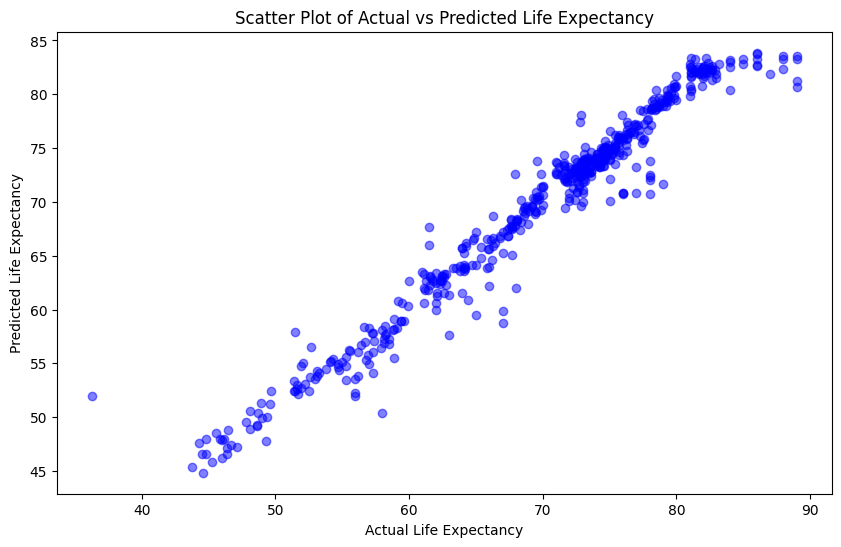

In [1213]:
plt.figure(figsize=(10, 6))
plt.scatter(yval, y_pred_val, color='blue', alpha=0.5)
plt.title('Scatter Plot of Actual vs Predicted Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy');

Dostali jsme celkem dobré značení RMSE, pojďme na regresi.

## Hřebenová regrese

Pro další práci jsem zvolila hřebenovou regresi. Ridge regrese se obvykle uplatňuje v případech vysoké korelace mezi nezávislými proměnnými. V předzpracování dat jsem smazala příznaky s nízkou korelací, takže ridge regrese mi připadá jako vhodný nástroj pro náš dataset.

Best alpha: 2
Intercept (w_hat_ridge): 86.4187
Coefficients: [ 4.44389494e-03 -1.46568239e-02 -2.37491379e+00 -1.98100653e-02
  4.44986335e-03 -2.93983513e-02 -1.49354160e-02 -2.10985904e-02
 -1.80288558e-03  4.23346739e-02 -1.17047823e-02  3.32217744e-02
  4.11656283e-02  5.08678759e-02 -4.84640641e-01  3.40993470e-05
 -8.50290889e-02  6.04303241e-02  5.64539205e+00  6.50261123e-01]
Validation RMSE (Ridge): 4.12929
Test RMSE (Ridge): 4.00213


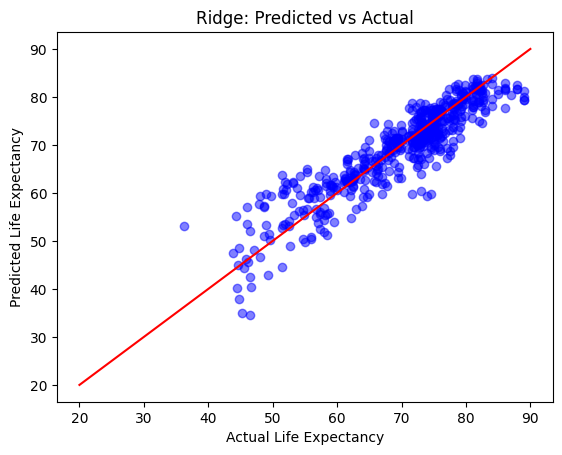

In [1214]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# hyperparameters
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1, 2],
    'max_iter': [100, 500, 1000],
    'tol': [1e-4, 1e-3, 1e-2],
}

ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=50, scoring='neg_mean_squared_error')
grid_search.fit(Xtrain, ytrain)

best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

clf_ridge = Ridge(alpha=best_alpha)
clf_ridge.fit(Xtrain, ytrain)

print(f'Intercept (w_hat_ridge): {clf_ridge.intercept_:.4f}')
print('Coefficients:', clf_ridge.coef_)

Y_val_pred_ridge = clf_ridge.predict(Xval)

rmse_val_ridge = mean_squared_error(yval, Y_val_pred_ridge, squared=False)
print(f'Validation RMSE (Ridge): {rmse_val_ridge:.5f}')

Y_test_pred_ridge = clf_ridge.predict(Xtest)

rmse_test_ridge = mean_squared_error(ytest, Y_test_pred_ridge, squared=False)
print(f'Test RMSE (Ridge): {rmse_test_ridge:.5f}')

plt.scatter(yval, Y_val_pred_ridge, color='blue', alpha=0.5)
plt.plot([20, 90], [20, 90], 'r')
plt.title('Ridge: Predicted vs Actual')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy');

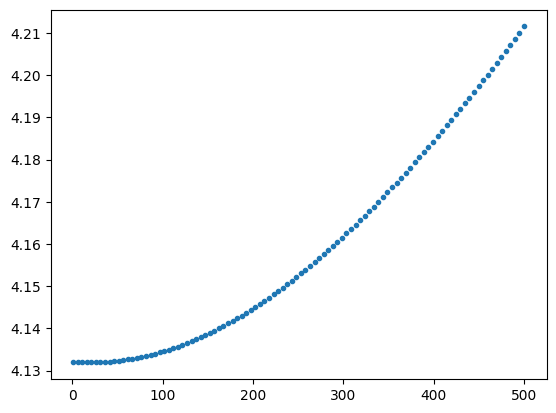

Optimal alpha  message: Solution found.
 success: True
  status: 0
     fun: 4.131911898384169
       x: 18.382199651662567
     nit: 29
    nfev: 29


Validační RMSE: 4.13191
Testovací RMSE: 4.00001


In [1215]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(Xtrain)

Xtrain_sc = scaler.transform(Xtrain)
Xval_sc = scaler.transform(Xval)
Xtest_sc = scaler.transform(Xtest)

clf_opt_ridge = get_opt_ridge_model(Xtrain_sc, Xval_sc)
RMSE_val_opt_ridge = mean_squared_error(yval, clf_opt_ridge.predict(Xval_sc), squared = False)
print(f'Validační RMSE: {RMSE_val_opt_ridge:.5f}')
RMSE_test_opt_ridge = mean_squared_error(ytest, clf_opt_ridge.predict(Xtest_sc), squared = False)
print(f'Testovací RMSE: {RMSE_test_opt_ridge:.5f}')

Takže dostali jsme hodnoty o něco horší než u náhodného lesu; standardizace situaci nezměnila. 


## AdaBoost

Dále bych chtěla zkusit udělat Adaptive Boosting.

Best hyperparameters: {'learning_rate': 3, 'loss': 'linear', 'n_estimators': 100}
Validation RMSE (AdaBoost): 3.03014
Test RMSE (AdaBoost): 2.89728


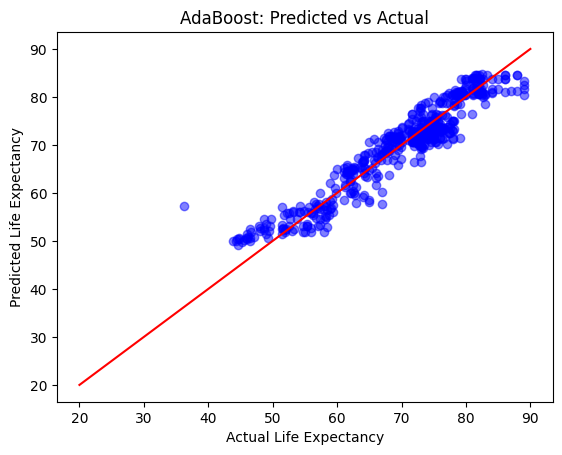

In [1216]:
from sklearn.ensemble import AdaBoostRegressor

# hyperparameters
param_grid = {
    'n_estimators': [5, 30, 100, 150, 200, 60],
    'learning_rate': [0.01, 0.1, 0.5, 0.6, 0.7, 2, 3, 1],
    'loss': ['linear', 'square', 'exponential'],
}

adaboost_model = AdaBoostRegressor()
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(Xtrain, ytrain)

best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

clf_adaboost = AdaBoostRegressor(**best_params)
clf_adaboost.fit(Xtrain, ytrain)

Y_val_pred_adaboost = clf_adaboost.predict(Xval)

rmse_val_adaboost = mean_squared_error(yval, Y_val_pred_adaboost, squared=False)
print(f'Validation RMSE (AdaBoost): {rmse_val_adaboost:.5f}')

Y_test_pred_adaboost = clf_adaboost.predict(Xtest)

rmse_test_adaboost = mean_squared_error(ytest, Y_test_pred_adaboost, squared=False)
print(f'Test RMSE (AdaBoost): {rmse_test_adaboost:.5f}')

plt.scatter(yval, Y_val_pred_adaboost, color='blue', alpha=0.5)
plt.plot([20, 90], [20, 90], 'r')
plt.title('AdaBoost: Predicted vs Actual')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy');

Hodnoty RMSE u AdaBoostu máme dobré, lepší než u regrese, ale horší než u lesa. 

____
Pro konečnou práci zvolím model náhodného lesa, protože evidentně má nejnižší hodnotu RMSE. Najdeme hodnotu MAE a použijeme model na testovacích datech. 

In [1217]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

best_hyperparameters = best_params_f
best_custom_random_forest_model = CustomRandomForest(**best_hyperparameters, random_state=42)
best_custom_random_forest_model.fit(Xtrain, ytrain)

y_pred_val = best_custom_random_forest_model.predict(Xval)
rmse_val = np.sqrt(mean_squared_error(yval, y_pred_val))
print(f'Root Mean Squared Error (RMSE) on Validation Set: {rmse_val}')

y_pred_test = best_custom_random_forest_model.predict(Xtest)
rmse_test = np.sqrt(mean_squared_error(ytest, y_pred_test))
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse_test}')

mae_test = mean_absolute_error(ytest, y_pred_test)
print(f'Mean Absolute Error (MAE) on Test Set: {mae_test}')

Root Mean Squared Error (RMSE) on Validation Set: 1.9652756550058843
Root Mean Squared Error (RMSE) on Test Set: 1.8681674657534348
Mean Absolute Error (MAE) on Test Set: 1.12867367408772


Hodnota na testovací části dat je trochu lepší. Můžu to analyzovat a říct, že to celkem může stát a může nám říkat, že nemáme overfitting, což je dobře.

Model náhodného lesa dále použijeme na evaluation datech.

## Evaluation

Načteme vyhodnocovací data ze souboru evaluation.csv.

In [1218]:
evaluation = pd.read_csv('evaluation.csv')

In [1219]:
display(evaluation.head())
evaluation.nunique()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Azerbaijan,2015,Developing,118.0,5,NaN,0.000000,96.0,0,52.5,...,98.0,NaN,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7
1,Azerbaijan,2014,Developing,119.0,5,0.01,306.182431,94.0,0,51.5,...,97.0,6.40,94.0,0.1,7891.299776,953579.0,2.8,2.9,0.752,12.2
2,Azerbaijan,2013,Developing,121.0,5,2.14,275.651493,93.0,164,5.6,...,96.0,5.54,93.0,0.1,7875.756953,941681.0,2.8,2.8,0.745,11.9
3,Azerbaijan,2012,Developing,123.0,5,0.01,285.610391,88.0,0,49.7,...,92.0,5.37,89.0,0.1,7496.335728,9295784.0,2.8,2.8,0.742,11.8
4,Azerbaijan,2011,Developing,125.0,5,1.98,263.142699,84.0,0,48.8,...,91.0,5.10,87.0,0.1,7189.691229,917382.0,2.8,2.9,0.741,11.7


Country                             35
Year                                 6
Status                               2
Adult Mortality                    149
infant deaths                       55
Alcohol                            118
percentage expenditure             139
Hepatitis B                         39
Measles                             98
BMI                                163
under-five deaths                   66
Polio                               39
Total expenditure                  158
Diphtheria                          38
HIV/AIDS                            44
GDP                                168
Population                         168
thinness  1-19 years                65
thinness 5-9 years                  66
Income composition of resources    167
Schooling                           76
dtype: int64

Provedeme stejné úpravy jako v případě našeho datasetu df.

In [1220]:
countries_to_update = ['Australia', 'Austria', 'Belgium', 'Bulgaria', 'Canada', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Republic of Korea', 'Romania', 'Singapore', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America']
evaluation.loc[evaluation['Country'].isin(countries_to_update), 'Status'] = 'Developed'

In [1221]:
evaluation[evaluation['Status'] == 'Developed']['Country'].unique()

array(['Belgium', 'Bulgaria', 'Canada', 'Czechia', 'Japan', 'Norway',
       'Slovakia', 'Slovenia'], dtype=object)

Uložím název země a rok do jiného DataFrame, aby nám nezmizeli názvy. 

In [1222]:
country_year_info = evaluation[['Country', 'Year']].copy()

In [1223]:
evaluation['Country'] = evaluation['Country'].astype("category")
evaluation['Status'] = evaluation['Status'].astype("category")
evaluation.Country = evaluation.Country.cat.codes
evaluation.Status = evaluation.Status.cat.codes

In [1224]:
evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          210 non-null    int8   
 1   Year                             210 non-null    int64  
 2   Status                           210 non-null    int8   
 3   Adult Mortality                  210 non-null    float64
 4   infant deaths                    210 non-null    int64  
 5   Alcohol                          171 non-null    float64
 6   percentage expenditure           210 non-null    float64
 7   Hepatitis B                      187 non-null    float64
 8   Measles                          210 non-null    int64  
 9   BMI                              204 non-null    float64
 10  under-five deaths                210 non-null    int64  
 11  Polio                            209 non-null    float64
 12  Total expenditure     

In [1225]:
evaluation.drop(columns=['Population'], inplace=True)

In [1226]:
evaluation = evaluation.rename(columns={'thinness  1-19 years': 'thinness 10-19 years'})

In [1227]:
evaluation = evaluation.fillna(median_values)

In [1228]:
evaluation.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,118.0,5,3.64,0.000000,96.0,0,52.5,6,98.0,5.76,96.0,0.1,55.313820,2.8,2.9,0.758,12.7
1,0,2014,1,119.0,5,0.01,306.182431,94.0,0,51.5,6,97.0,6.40,94.0,0.1,7891.299776,2.8,2.9,0.752,12.2
2,0,2013,1,121.0,5,2.14,275.651493,93.0,164,5.6,6,96.0,5.54,93.0,0.1,7875.756953,2.8,2.8,0.745,11.9
3,0,2012,1,123.0,5,0.01,285.610391,88.0,0,49.7,6,92.0,5.37,89.0,0.1,7496.335728,2.8,2.8,0.742,11.8
4,0,2011,1,125.0,5,1.98,263.142699,84.0,0,48.8,6,91.0,5.10,87.0,0.1,7189.691229,2.8,2.9,0.741,11.7


A podle zadání použijeme nejlepší model (les) na našem evalučním datasetu a načteme do výsledkového souboru. 

In [1229]:
predictions = best_custom_random_forest_model.predict(evaluation)
rounded_predictions = predictions.round(1)

predictions_df = pd.DataFrame({'Life expectancy': rounded_predictions})

results = pd.concat([country_year_info, predictions_df], axis=1)

results.to_csv('results.csv', index=False)

Predikce vypadá velmi pravděpodobně, protože pro země jako Japonsko nebo Norsko mají délku života větší než 80 let, což odpovídá realitě, zatímco země jako Kongo nebo Malawi mají méně než 60 let.

### Konec